# Name:Md Sajadul Islam Dipu
Machine Learning and Data Scince enthusiast

#Research Interest:
Machine Learning, Deep Learning, Cyber Security, Data Mining and Data Scince
# Project Name:
**Advancing News Authenticity through Machine Learning**

# Goal of this Project:

1. Detecting the fake news using several types of advanced classification ML Model and get the accuracy 99.83%, which is almost 100%

2. Help the organization to detect fake news and save their reputation

In [61]:
# Advancing News Authenticity through Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [62]:
try:
    fake = pd.read_csv("/content/Fake.csv")
    true = pd.read_csv("/content/True.csv")
except pd.errors.ParserError as e:
    print("Error reading CSV:", e)

In [63]:
fake.shape

(23481, 4)

In [64]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [65]:
true.shape

(21417, 4)

In [66]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

# Data cleaning and preparation

In [67]:
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [69]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [70]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [71]:
data.head(5)


,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [72]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [73]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [74]:
# Check the data
data.head()

,title,text,subject,date,target
0,Guess Which Supreme Court Justice Got Caught ...,"These days, a certain few justices on the Supr...",News,"April 23, 2016",fake
1,THIS IS THE ALT-LEFT the Fake News Media Refus...,The media is trying their best to control what...,politics,"Aug 18, 2017",fake
2,Russia accuses U.S.-led coalition of 'barbaric...,MOSCOW (Reuters) - Russia accused the U.S.-led...,worldnews,"October 22, 2017",true
3,"With healthcare bill dead, Republicans turn to...",WASHINGTON (Reuters) - After failing to repeal...,politicsNews,"March 24, 2017",true
4,Connecticut's governor says no return to pre-r...,NEW YORK (Reuters) - Connecticut Governor Dann...,politicsNews,"February 3, 2016",true


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [76]:
# Removing the date as it is not imortant to train ML model
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Guess Which Supreme Court Justice Got Caught ...,"These days, a certain few justices on the Supr...",News,fake
1,THIS IS THE ALT-LEFT the Fake News Media Refus...,The media is trying their best to control what...,politics,fake
2,Russia accuses U.S.-led coalition of 'barbaric...,MOSCOW (Reuters) - Russia accused the U.S.-led...,worldnews,true
3,"With healthcare bill dead, Republicans turn to...",WASHINGTON (Reuters) - After failing to repeal...,politicsNews,true
4,Connecticut's governor says no return to pre-r...,NEW YORK (Reuters) - Connecticut Governor Dann...,politicsNews,true


In [77]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"These days, a certain few justices on the Supr...",News,fake
1,The media is trying their best to control what...,politics,fake
2,MOSCOW (Reuters) - Russia accused the U.S.-led...,worldnews,true
3,WASHINGTON (Reuters) - After failing to repeal...,politicsNews,true
4,NEW YORK (Reuters) - Connecticut Governor Dann...,politicsNews,true


In [78]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"these days, a certain few justices on the supr...",News,fake
1,the media is trying their best to control what...,politics,fake
2,moscow (reuters) - russia accused the u.s.-led...,worldnews,true
3,washington (reuters) - after failing to repeal...,politicsNews,true
4,new york (reuters) - connecticut governor dann...,politicsNews,true


In [79]:
# Remove punctuation marks

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [80]:
# Check
data.head()

,text,subject,target
0,these days a certain few justices on the supre...,News,fake
1,the media is trying their best to control what...,politics,fake
2,moscow reuters russia accused the usled coali...,worldnews,true
3,washington reuters after failing to repeal ob...,politicsNews,true
4,new york reuters connecticut governor dannel ...,politicsNews,true


In [81]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
data.head()

,text,subject,target
0,days certain justices supreme court republican...,News,fake
1,media trying best control see see comes altlef...,politics,fake
2,moscow reuters russia accused usled coalition ...,worldnews,true
3,washington reuters failing repeal obamacare re...,politicsNews,true
4,new york reuters connecticut governor dannel m...,politicsNews,true


# Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


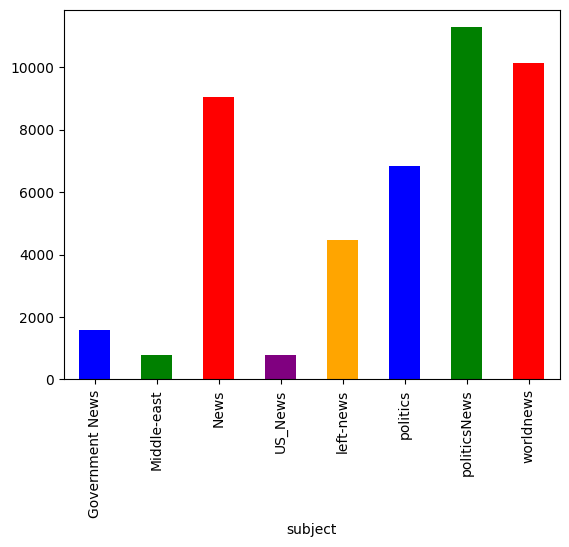

In [83]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())

# Plot the bar plot with different colors
data.groupby(['subject'])['text'].count().plot(kind="bar", color=['blue', 'green', 'red', 'purple', 'orange'])
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


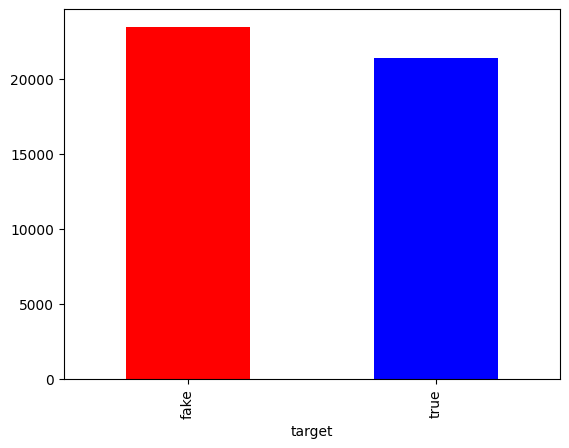

In [84]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar", color=['red', 'blue'])
plt.show()

In [85]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

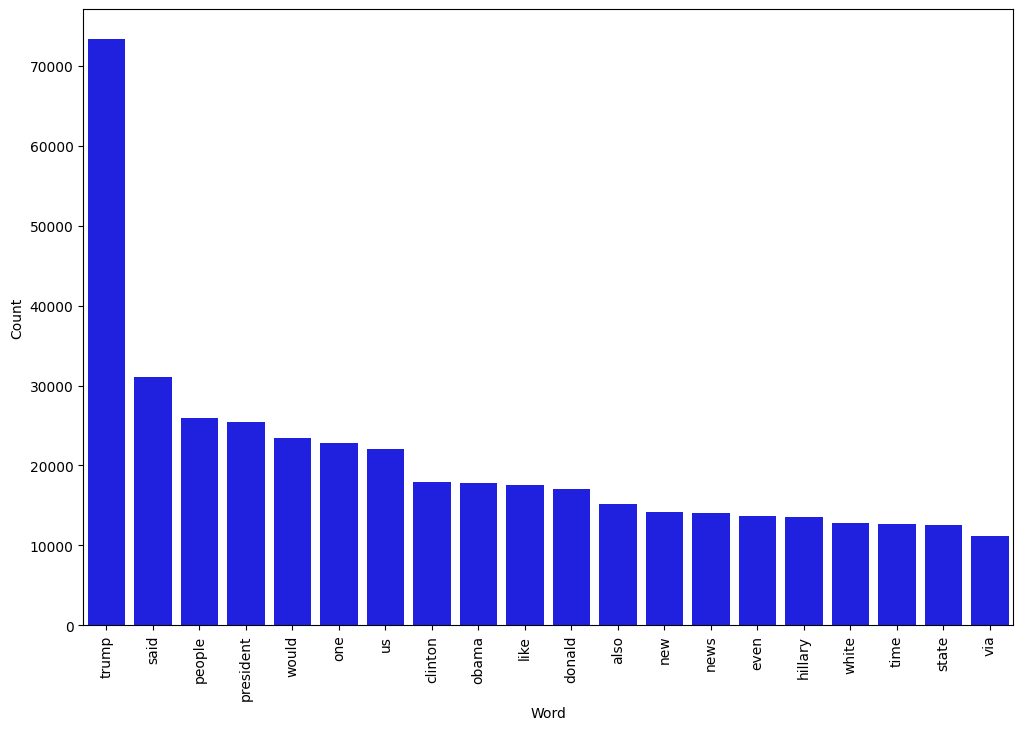

In [86]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

# The above figure represents the most frequent word that is used in Fake news from the Dataset

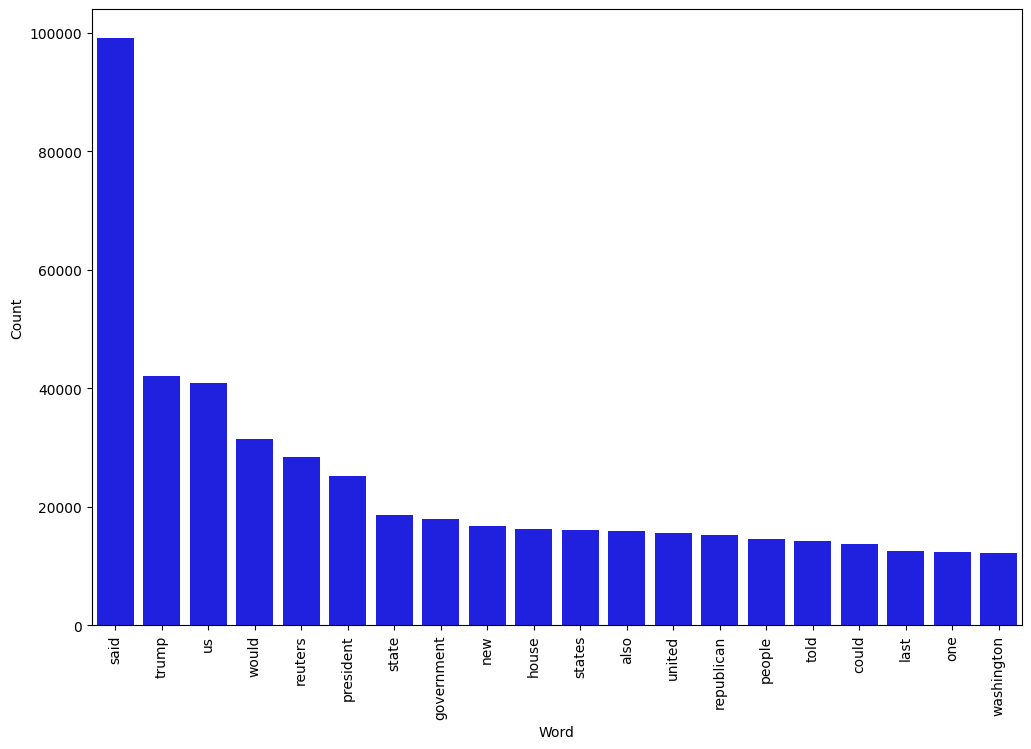

In [87]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [88]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Split Data

In [92]:

# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [93]:

X_train.head(10)

36335    caracas reuters members venezuela government o...
12384    beijing reuters china foreign ministry reitera...
24419    president donald trump senior counselor kellya...
24740    corrects nov 14 clarify details bolton’s reces...
27039    berlin reuters german president frankwalter st...
24163    washington reuters us president donald trump c...
33954    elton john perform donald trump inauguration c...
3803     fox news even give guy microphone lost relevan...
3566     washington reuters us house speaker paul ryan ...
5174     think stop hillary pac needs double ad campaig...
Name: text, dtype: object

In [94]:
y_train.head(10)

36335    true
12384    true
24419    fake
24740    true
27039    true
24163    true
33954    fake
3803     fake
3566     true
5174     fake
Name: target, dtype: object

# Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("Accuracy of DT: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy of DT: 99.74%


Confusion matrix, without normalization


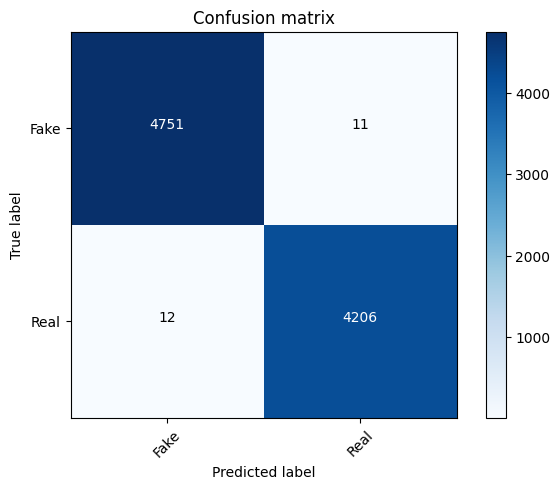

In [109]:
# Confusion Matrix of DT Classifier
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest Classifiers

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier pipeline
pipe_rf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', RandomForestClassifier(n_estimators=100, random_state=42))])

# Fitting the Random Forest model
model_rf = pipe_rf.fit(X_train, y_train)

# Predict using the Random Forest model
prediction_rf = model_rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, prediction_rf)
print("Accuracy of RF: {}%".format(round(accuracy_rf * 100, 2)))


Accuracy of RF: 99.37%


Confusion matrix, without normalization


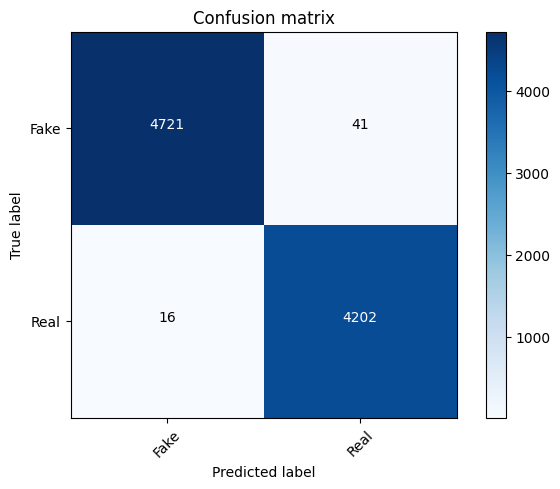

In [110]:
# confusion matrix of RF model
cm_rf = confusion_matrix(y_test, prediction_rf)
plot_confusion_matrix(cm_rf, classes=['Fake', 'Real'])
plt.show()

# XGBoost Classifier

In [108]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Convert target labels to numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create an XGBoost classifier pipeline
pipe_xgb = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', XGBClassifier(random_state=42))])

# Fitting the XGBoost model
model_xgb = pipe_xgb.fit(X_train, y_train_encoded)

# Predict using the XGBoost model
prediction_xgb_encoded = model_xgb.predict(X_test)

# Calculate accuracy
accuracy_xgb_encoded = accuracy_score(y_test_encoded, prediction_xgb_encoded)
print("XGBoost Accuracy: {}%".format(round(accuracy_xgb_encoded * 100, 2)))


XGBoost Accuracy: 99.83%


Confusion matrix, without normalization


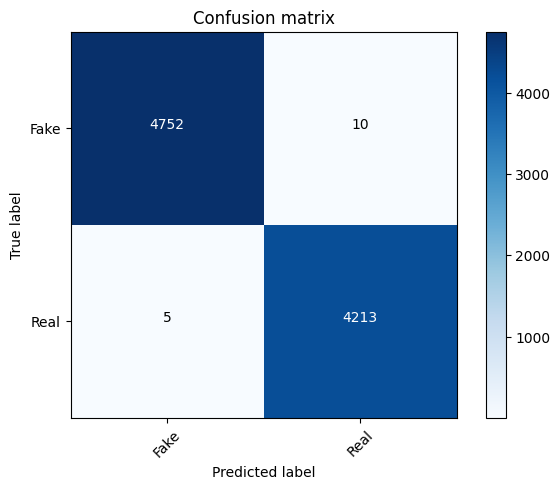

In [111]:
# confusion_matrix of XG Boost
xg_cm = confusion_matrix(y_test_encoded, prediction_xgb_encoded)
plot_confusion_matrix(xg_cm, classes=['Fake', 'Real'])

# LightGBM Classifer

In [112]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

# Convert target labels to numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create a LightGBM classifier pipeline
pipe_lgbm = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('model', LGBMClassifier(random_state=42))])

# Fitting the LightGBM model
model_lgbm = pipe_lgbm.fit(X_train, y_train_encoded)

# Predict using the LightGBM model
prediction_lgbm_encoded = model_lgbm.predict(X_test)

# Calculate accuracy
accuracy_lgbm_encoded = accuracy_score(y_test_encoded, prediction_lgbm_encoded)
print("LightGBM Accuracy: {}%".format(round(accuracy_lgbm_encoded * 100, 2)))


[LightGBM] [Info] Number of positive: 17199, number of negative: 18719
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 9.991482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1117906
[LightGBM] [Info] Number of data points in the train set: 35918, number of used features: 19312
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478841 -> initscore=-0.084688
[LightGBM] [Info] Start training from score -0.084688
LightGBM Accuracy: 99.8%


Confusion matrix, without normalization


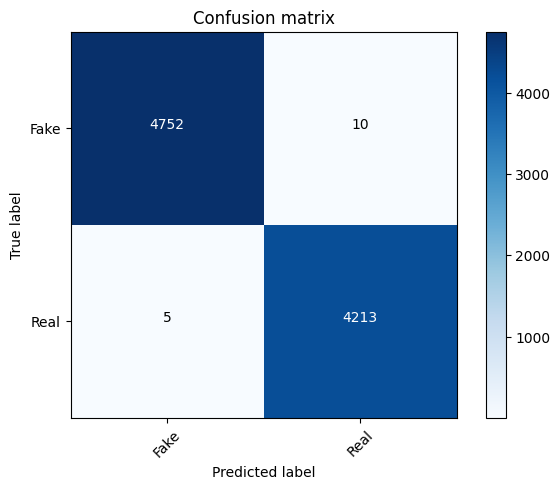

In [113]:
# confusion_matrix of LightGBM
lg_cm = confusion_matrix(y_test_encoded, prediction_lgbm_encoded)
plot_confusion_matrix(xg_cm, classes=['Fake', 'Real'])

# Real Time Prediction

In [119]:
# Fitting the XGBoost model
model_xgb = pipe_xgb.fit(X_train, y_train_encoded)

# Save the trained model using joblib
import joblib
joblib.dump(model_xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [120]:
# Load the pre-trained XGBoost model
model = joblib.load('xgboost_model.pkl')

In [131]:
import re
import nltk
import joblib
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Load NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the pre-trained XGBoost model
model = joblib.load('/content/xgboost_model.pkl')

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Real-time news fake/real detection function
def detect_fake_real_news(news_text):
    # Preprocess the news text
    preprocessed_text = preprocess_text(news_text)

    # Load label encoder
    le = LabelEncoder()
    le.fit(y_train)

    # Create a new pipeline for real-time prediction using the trained XGBoost model
    pipe_predict = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', model_xgb.named_steps['model'])
    ])

    # Fit the vectorizer and transformer with training data
    pipe_predict['vect'].fit(X_train)
    pipe_predict['tfidf'].fit(pipe_predict['vect'].transform(X_train))

    # Make a prediction
    prediction = pipe_predict.predict([preprocessed_text])  # Pass a list containing the text
    predicted_label = le.inverse_transform(prediction)[0]

    return predicted_label



# Example usage
# Define two news texts
fake_news = "the media is trying their best to control what..."
true_news = "new york (reuters) - connecticut governor dann...	"

# Predict the labels for the defined news texts
result_fake = detect_fake_real_news(fake_news)
result_true = detect_fake_real_news(true_news)

# Print the predicted labels
print("Predicted Label for Fake News:", result_fake)
print("Predicted Label for True News:", result_true)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Predicted Label for Fake News: fake
Predicted Label for True News: true
